# K-means Clustering

### Import resources and display image

(2000, 3008, 3)


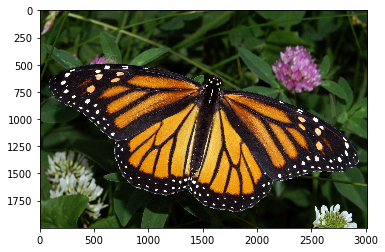

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
print(image.shape)

### Prepare data for k-means

In [2]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
print(pixel_vals)
# Convert to float type
pixel_vals = np.float32(pixel_vals)

[[33 66 23]
 [33 66 23]
 [33 66 23]
 ...
 [23 44 11]
 [24 43 11]
 [24 43 11]]


### Implement k-means clustering

[[2]
 [2]
 [2]
 ...
 [1]
 [1]
 [1]]


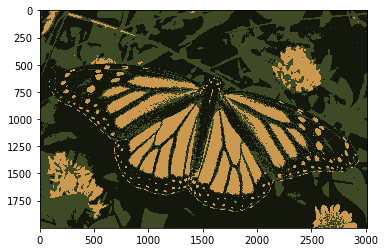

In [5]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
#EPS = epsilon =0.2 if mean taken moves the center by less than this value indicate stop of kmeans

## TODO: Select a value for k
# then perform k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#None = no labels
#10 = no.of iteration
#we assign cluster centre randomly
print(labels)
# convert data into 8-bit values
centers = np.uint8(centers)

segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

In [6]:
print(segmented_data)

[[62 74 38]
 [62 74 38]
 [62 74 38]
 ...
 [20 24 12]
 [20 24 12]
 [20 24 12]]


In [7]:
print(centers)

[[204 153  80]
 [ 20  24  12]
 [ 62  74  38]]


In [9]:
print(labels_reshape)

[[2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 ...
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]]


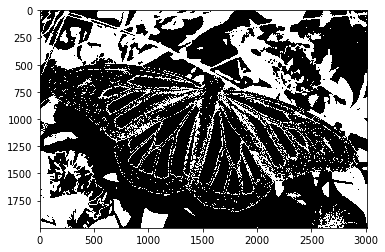

In [14]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
plt.imshow(labels_reshape==2, cmap='gray') #3 cluster 0,1,2

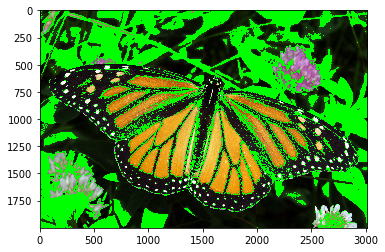

In [12]:
# mask an image segment by cluster

cluster = 2 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)